# cab fare prediction

In [1]:
#Load libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from random import randrange, uniform

In [2]:
# setting working directory
os.chdir("R:/vishakha r progaram/projects")

In [3]:
os.getcwd()

'R:\\vishakha r progaram\\projects'

In [4]:
#loading  data 
cab_tr = (pd.read_csv('train_cab.csv', header = 0 )).drop(columns="pickup_datetime")

In [5]:
cab_tr.shape

(16067, 6)

In [6]:
cab_tr.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0


# Exploratory data analysis

In [7]:
#remove the location where drop  location = pickup location
cab_tr=cab_tr[np.logical_and(cab_tr['pickup_longitude'] != cab_tr['dropoff_longitude'],
                                    cab_tr['pickup_latitude'] != cab_tr['dropoff_latitude'])]

In [8]:
#replace 0 with NA in the variables and convert the data wherever required for further operations
cab_tr['fare_amount']= cab_tr['fare_amount'].apply(pd.to_numeric, errors='coerce')
cab_tr['fare_amount']= cab_tr['fare_amount'].replace({0:np.nan})
cab_tr['passenger_count']=cab_tr['passenger_count'].fillna(0)
cab_tr['passenger_count']= cab_tr['passenger_count'].astype(int)
cab_tr['passenger_count']=cab_tr['passenger_count'].replace({0: np.nan})
cab_tr['pickup_longitude']= cab_tr['pickup_longitude'].replace({0:np.nan})
cab_tr['pickup_latitude']= cab_tr['pickup_latitude'].replace({0:np.nan})
cab_tr['dropoff_longitude']= cab_tr['dropoff_longitude'].replace({0:np.nan})
cab_tr['dropoff_latitude']= cab_tr['dropoff_latitude'].replace({0:np.nan})

In [9]:
cab_tr.shape

(15603, 6)

In [10]:
cab_tr.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0


# Data preprocessing -Missing Value Analysis

In [11]:
#calculate missing values
# summing (missing_val)
missing_val = pd.DataFrame(cab_tr.isnull().sum())

In [12]:
#Reset index
missing_val = missing_val.reset_index()

In [13]:
missing_val

,index,0
0,fare_amount,24
1,pickup_longitude,12
2,pickup_latitude,12
3,dropoff_longitude,10
4,dropoff_latitude,9
5,passenger_count,112


In [14]:
#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'count'})

In [15]:
missing_val

,Variables,count
0,fare_amount,24
1,pickup_longitude,12
2,pickup_latitude,12
3,dropoff_longitude,10
4,dropoff_latitude,9
5,passenger_count,112


In [16]:
#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['count']/len(cab_tr)*100)
#print(missing_val)

#sort in descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
print(missing_val)

           Variables  count  Missing_percentage
0    passenger_count    112            0.717811
1        fare_amount     24            0.153817
2   pickup_longitude     12            0.076908
3    pickup_latitude     12            0.076908
4  dropoff_longitude     10            0.064090
5   dropoff_latitude      9            0.057681


In [17]:
#save output results 
missing_val.to_csv("Miising_perc.csv", index = False)

# missing Value imputation

In [18]:
#imputation method 
#Actual value = -73.99578100000001
#Mean = -73.91159336554888
#Median = -73.98172199999999

In [19]:
#Create missing value, a small test to identify which method is good for imputation

#cab_tr["pickup_longitude"].loc[70]

In [20]:
#cab_tr["pickup_longitude"].loc[70] = np.nan

In [21]:
#cab_tr["pickup_longitude"].loc[70] 

In [22]:
#Mean Imputation
#cab_tr['pickup_longitude'] =cab_tr['pickup_longitude'].fillna(cab_tr['pickup_longitude'].mean())

In [23]:
#Median Imputation
#cab_tr['pickup_longitude'] = cab_tr['pickup_longitude'].fillna(cab_tr['pickup_longitude'].median())

In [24]:
#As it is found Mean is very close to original method we will proceed with imputation via mean
cab_tr['fare_amount'] = cab_tr['fare_amount'].fillna(cab_tr['fare_amount'].mean())
cab_tr['pickup_longitude']= cab_tr['pickup_longitude'].fillna(cab_tr['pickup_longitude'].mean())
cab_tr['pickup_latitude']= cab_tr['pickup_latitude'].fillna(cab_tr['pickup_latitude'].mean())
cab_tr['dropoff_longitude']= cab_tr['dropoff_longitude'].fillna(cab_tr['dropoff_longitude'].mean())
cab_tr['dropoff_latitude']= cab_tr['dropoff_latitude'].fillna(cab_tr['dropoff_latitude'].mean())

In [25]:
#And for category variables imputation is done with mode
cab_tr['passenger_count'] = cab_tr['passenger_count'].fillna(int(cab_tr['passenger_count'].mode()))

In [26]:
#Imputing the NAs in target variables may hamper the model, so it is preferred to remove NA rows of the data
cab_tr=cab_tr.dropna()

In [27]:
(cab_tr.isnull().sum())

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [28]:
#conert into proper data type
convert_dic={'fare_amount' : 'float','passenger_count': 'int'}
cab_tr=cab_tr.astype(convert_dic)

In [29]:
cab_tr.shape

(15603, 6)

In [30]:
#save the data with in another place with different name
df = cab_tr.copy()

# Outlier analysis

In [31]:
# irregular fare_amount are converted to NA 
cab_tr.loc[cab_tr['fare_amount']<0 , 'fare_amount']=np.nan
cab_tr.loc[cab_tr['fare_amount'] > 30, 'fare_amount']=np.nan

In [32]:
#removing NA 
cab_tr=cab_tr.dropna()

In [33]:
#irregular passenger counts or those wgich are greater then 8 convertet to NaN
cab_tr.loc[cab_tr['passenger_count'] > 8,'passenger_count'] = np.nan

In [34]:
cab_tr['passenger_count'].unique() 

array([ 1.,  2.,  3.,  6.,  5.,  4., nan])

In [35]:
cab_tr.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

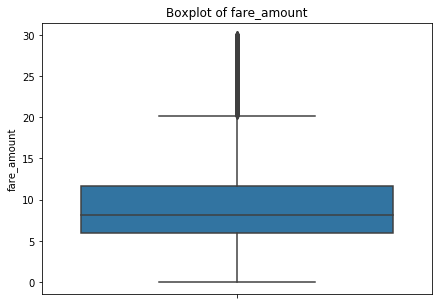

In [36]:
plt.figure(figsize=(7,5)) 
plt.xlim(0,100)
sns.boxplot(x=cab_tr['fare_amount'],data=cab_tr,orient='v')
plt.title('Boxplot of fare_amount')
# plt.savefig('bp of fare_amount.png')
plt.show()

In [37]:
#save numeric data names
coutliers = [ 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

In [38]:
#outlier extraction and convert it into NA
coutliers = [ 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
for list in coutliers:
    #Detect and replace with NA
    #Extract quartiles
    q75, q25 = np.percentile(cab_tr[list], [75 ,25])

    #Calculate IQR
    iqr = q75 - q25
   
    # #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)

    # #Replace with NA
    cab_tr.loc[cab_tr[list] < minimum,list] = np.nan
    cab_tr.loc[cab_tr[list] > maximum,list] = np.nan

    # #Calculate missing value
    missing_val = pd.DataFrame(cab_tr.isnull().sum())

In [39]:
 missing_val

,0
fare_amount,0
pickup_longitude,407
pickup_latitude,310
dropoff_longitude,556
dropoff_latitude,559
passenger_count,18


In [40]:
#As Mean is the best method, we impute missing values/ in this case outlier values with mean

cab_tr['pickup_longitude'] = cab_tr['pickup_longitude'].fillna(cab_tr['pickup_longitude'].mean())
cab_tr['pickup_latitude'] = cab_tr['pickup_latitude'].fillna(cab_tr['pickup_latitude'].mean())
cab_tr['dropoff_longitude'] = cab_tr['dropoff_longitude'].fillna(cab_tr['dropoff_longitude'].mean())
cab_tr['dropoff_longitude'] = cab_tr['dropoff_longitude'].fillna(cab_tr['dropoff_longitude'].mean())
cab_tr['dropoff_latitude'] = cab_tr['dropoff_latitude'].fillna(cab_tr['dropoff_latitude'].mean())

In [41]:
#imputed with mode for categorical variables
cab_tr['passenger_count'] = cab_tr['passenger_count'].fillna(int(cab_tr['passenger_count'].mode()))

In [42]:
 pd.DataFrame(cab_tr.isnull().sum())

,0
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [43]:
#convert the data type of categorical variable passenger count
cab_tr['passenger_count']=cab_tr['passenger_count'].astype('int')
cab_tr['passenger_count']=cab_tr['passenger_count'].astype('category')

In [44]:
cab_tr['passenger_count'].dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6], ordered=False)

# feature enginering

In [45]:
#calculate the distance 
# with help of haversine formula
#haversine function

def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
   
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [46]:
#apply function to the  data
cab_tr['Distance'] = \
    haversine( cab_tr['pickup_latitude'], cab_tr['pickup_longitude'],
                cab_tr['dropoff_latitude'], cab_tr['dropoff_longitude'])

feture slection
Testing correlation and multi colinearity of data


In [47]:
#Correlation analysis
#Correlation plot
numeric=['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude', 'Distance']
cab_tr_corr = cab_tr.loc[:,numeric]

                   fare_amount  pickup_longitude  pickup_latitude  \
fare_amount           1.000000         -0.048793        -0.057861   
pickup_longitude     -0.048793          1.000000         0.667883   
pickup_latitude      -0.057861          0.667883         1.000000   
dropoff_longitude     0.047996          0.364514         0.293342   
dropoff_latitude     -0.077377          0.318350         0.442597   
Distance              0.670142         -0.045910        -0.081076   

                   dropoff_longitude  dropoff_latitude  Distance  
fare_amount                 0.047996         -0.077377  0.670142  
pickup_longitude            0.364514          0.318350 -0.045910  
pickup_latitude             0.293342          0.442597 -0.081076  
dropoff_longitude           1.000000          0.595164  0.063220  
dropoff_latitude            0.595164          1.000000 -0.061677  
Distance                    0.063220         -0.061677  1.000000  


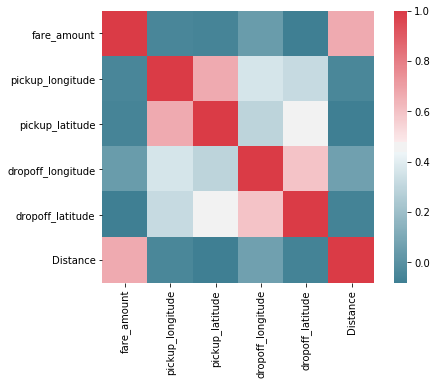

In [48]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = cab_tr_corr.corr()
print(corr)

#Plotted using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [49]:
#eliminate all data with the pickup and drop location points as same

cab_tr=cab_tr[np.logical_and(cab_tr['pickup_longitude'] != cab_tr['dropoff_longitude'],
                                     cab_tr['pickup_latitude'] != cab_tr['dropoff_latitude'])]

(array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 4.300e+01,
        6.200e+01, 3.960e+02, 4.740e+02, 6.540e+02, 7.490e+02, 8.070e+02,
        8.100e+02, 4.480e+02, 1.157e+03, 7.010e+02, 6.630e+02, 6.560e+02,
        6.150e+02, 5.530e+02, 5.140e+02, 6.470e+02, 4.140e+02, 3.880e+02,
        3.300e+02, 2.910e+02, 1.400e+02, 3.770e+02, 2.430e+02, 2.010e+02,
        1.620e+02, 1.490e+02, 1.790e+02, 1.400e+02, 2.080e+02, 1.450e+02,
        1.210e+02, 1.040e+02, 7.900e+01, 4.100e+01, 1.100e+02, 7.900e+01,
        7.200e+01, 6.900e+01, 6.200e+01, 5.700e+01, 7.800e+01, 5.600e+01,
        4.600e+01, 3.900e+01, 3.800e+01, 4.400e+01, 1.600e+01, 4.500e+01,
        3.600e+01, 4.600e+01, 2.300e+01, 3.300e+01, 3.500e+01, 2.200e+01,
        3.700e+01, 2.600e+01, 2.900e+01, 1.600e+01, 1.800e+01]),
 array([1.00000000e-02, 4.71384615e-01, 9.32769231e-01, 1.39415385e+00,
        1.85553846e+00, 2.31692308e+00, 2.77830769e+00, 3.23969231e+00,
        3.70107692e+00, 4.16246154e+00, 4.62384615e

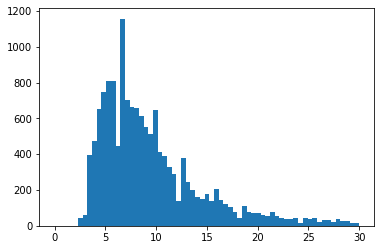

In [50]:
#ploting graph for distribution 
%matplotlib inline  
plt.hist(cab_tr['fare_amount'], bins='auto')

(array([164., 123., 264., 505., 676., 851., 860., 915., 874., 761., 717.,
        682., 607., 598., 531., 505., 449., 427., 371., 328., 308., 311.,
        266., 221., 227., 187., 206., 168., 172., 151., 153., 124.,  96.,
         96.,  95.,  88.,  96.,  80.,  63.,  78.,  55.,  37.,  37.,  42.,
         28.,  24.,  17.,  13.,  16.,  14.,  19.,  13.,  11.,   8.,   7.,
         10.,   7.,   3.,   8.,   5.,   7.,   3.,   2.,   2.,   5.,   1.,
          0.,   2.,   2.,   1.,   1.,   0.,   0.,   1.]),
 array([2.01868456e-04, 1.67891039e-01, 3.35580209e-01, 5.03269380e-01,
        6.70958550e-01, 8.38647721e-01, 1.00633689e+00, 1.17402606e+00,
        1.34171523e+00, 1.50940440e+00, 1.67709357e+00, 1.84478274e+00,
        2.01247191e+00, 2.18016108e+00, 2.34785026e+00, 2.51553943e+00,
        2.68322860e+00, 2.85091777e+00, 3.01860694e+00, 3.18629611e+00,
        3.35398528e+00, 3.52167445e+00, 3.68936362e+00, 3.85705279e+00,
        4.02474196e+00, 4.19243113e+00, 4.36012030e+00, 4.52780947

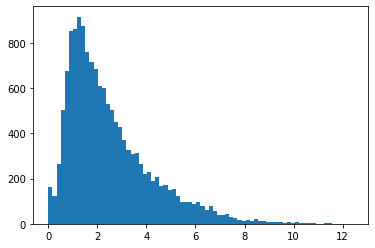

In [51]:
%matplotlib inline  
plt.hist(cab_tr['Distance'], bins='auto')

right skeewd both Distance and fare amount

# Model Development

DECISION TREE

In [52]:
#Load libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [53]:
# Divide the data into train and test
train1, test1 = train_test_split(cab_tr, test_size=0.2)

In [54]:
# Decision tree for regression
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train1.iloc[:, 1:7], train1.iloc[:,0])

In [55]:
fit_DT

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [56]:
#Apply model on test data
predictions_DT = fit_DT.predict(test1.iloc[:,1:7])

In [57]:
#Apply model on test data
predictions_DT

array([ 9.03569692, 12.13155914,  9.03569692, ...,  6.41195109,
       12.13155914,  6.41195109])

In [58]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

In [59]:
MAPE(test1.iloc[:,0], predictions_DT)

29.92841367123023

In [62]:
#Error rate =29.92841367123023
#Accuracy rate = 70.07158632876977

RANDOM FOREST

In [63]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

In [64]:
RF_model = RandomForestRegressor(n_estimators = 10).fit(train1.iloc[:, 1:7], train1.iloc[:,0])

In [65]:
RF_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [66]:
RF_Predictions = RF_model.predict(test1.iloc[:, 1:7])

In [67]:
RF_Predictions

array([10.58,  9.72, 10.03, ...,  6.56, 10.21,  4.73])

In [68]:
MAPE(test1.iloc[:,0], RF_Predictions)

25.141362147213382

In [71]:
#Error Rate= 25.141362147213382 
#Accuracy Rate =74.85863785278661


74.85863785278661

LINEAR REGRESSION

In [72]:
#Combine all the values in one array
values=['fare_amount', 'pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'Distance']

In [73]:
linear_Data = cab_tr[values]

In [74]:
#This function is developed to get columns for specific passenger count. The idea is developed from R linear regression fit, 
#which explains all the passenger count individualy contributes in the model 

cat_names = ['passenger_count'] 
for i in cat_names:
    temp = pd.get_dummies(cab_tr[i], prefix= i)
    linear_Data = linear_Data.join(temp)

In [75]:
linear_Data.shape

(14795, 12)

In [76]:
linear_Data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
0,4.5,-73.981698,40.721319,-73.980230,40.712278,1.012897,1,0,0,0,0,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,8.450134,1,0,0,0,0,0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,1.389525,0,1,0,0,0,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,2.799270,1,0,0,0,0,0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.999157,1,0,0,0,0,0


In [77]:
#Spliting the newly created data set with passenger count dummies
train1, test1 = train_test_split(linear_Data, test_size=0.2)

In [78]:
#Import libraries for LR
import statsmodels.api as sm

In [79]:
# Train the model using the training sets
model = sm.OLS(train1.iloc[:, 0].astype(float), train1.iloc[:, 1:12].astype(float)).fit()

In [82]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     976.1
Date:                Mon, 23 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:18:49   Log-Likelihood:                -32741.
No. Observations:               11836   AIC:                         6.550e+04
Df Residuals:                   11825   BIC:                         6.559e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
pickup_longitude    -15.7194      3.074     -5.113      0.000     -21.746      -9.693
pickup_latitude      11.2445      2.380      4.724      0.000       6.579      15.910
dropoff_longitude    14.7687      2.710      5.449      0.000       9.456      20.082
dropoff_latitude    -15.8372      2.120     -7.470      0.000     -19.993     -11.682
Distance              2.0030      0.021     96.203      0.000       1.962       2.044
passenger_count_1   121.3985    341.997      0.355      0.723    -548.972     791.769
passenger_count_2   121.4710    341.999      0.355      0.722    -548.903     791.845
passenger_count_3   121.5921    342.002      0.356      0.722    -548.789     791.973
passenger_count_4   121.5679    342.001      0.355      0.722    -548.811     791.947
passenger_count_5   121.3005    341.999      0.355      0.723    -549.073     791.674
passenger_count_6   122.5210    341.998      0.358      0.720    -547.851     792.893
==============================================================================
Omnibus:                     5882.065   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42278.071
Skew:                           2.295   Prob(JB):                         0.00
Kurtosis:                      11.041   Cond. No.                     2.83e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
#make the predictions by the model
predictions_LR = model.predict(test1.iloc[:,1:12])

In [81]:
predictions_LR

9226     15.721057
10513    12.703888
15753     9.437513
12575     6.906785
4109     14.263653
4742      6.609435
12401     8.902731
14377     8.614302
6275     10.021583
352       7.930056
10400     6.874812
8339      5.551934
8375      5.951566
15814     7.344189
12669     9.561687
8477      6.867844
7941      8.931820
4324      5.805686
14139    10.123361
1964      5.914778
2083      9.143299
10295     7.450295
15965     6.520367
6776      7.278697
15507    19.243673
3483      9.000537
1128     20.474954
1781      6.296259
12334     9.035687
6250      7.560356
           ...    
1572     19.855183
14257    15.773581
15253     5.810352
3040      8.686728
10609     8.197532
12143    14.625882
12052     6.826609
28       11.335818
6958      9.883014
13767    10.406787
15211     9.149517
10546     7.467018
8159     18.674505
14682     7.866297
1530      5.358070
13925     9.249356
623       8.018461
8666      6.445259
4050      7.557537
10482     8.924689
3829     19.506127
9001      7.

In [83]:
#Calculate MAPE
MAPE(test1.iloc[:,0], predictions_LR)

26.814478088303616

In [89]:
# Error Rate=26.814478088303616
#Accuracy Rate =73.18552191169638 
100-26.814478088303616

73.18552191169638

 KNN Imputation

In [85]:
#KNN implementation
from sklearn.neighbors import KNeighborsRegressor

KNN_model = KNeighborsRegressor(n_neighbors = 1).fit(train1.iloc[: , 1:7], train1.iloc[:, 0])

In [86]:
#predict test cases
KNN_Predictions = KNN_model.predict(test1.iloc[: , 1:7])

In [87]:
KNN_Predictions 

array([15.3, 11.5,  6.9, ...,  9.7,  8.9,  6.1])

In [88]:
MAPE(test1.iloc[:,0], KNN_Predictions)

33.96770745236633

In [90]:
#Error Rate = 33.96770745236633
#Accuracy Rate =66.03229254763367
100-33.96770745236633

66.03229254763367

# Prediction on original test data

In [91]:
pred=(pd.read_csv('test.csv', header = 0 )).drop(columns="pickup_datetime")

In [92]:
#create Dist variable
pred['Distance'] = \
    haversine( pred['pickup_latitude'], pred['pickup_longitude'],
                 pred['dropoff_latitude'], pred['dropoff_longitude'])

pred['fare_amount']=0
pred['passenger_count']=pred['passenger_count'].astype('category')

In [93]:
pred

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,fare_amount
0,-73.973320,40.763805,-73.981430,40.743835,1,2.323259,0
1,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,0
2,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,0
3,-73.981160,40.767807,-73.990448,40.751635,1,1.961033,0
4,-73.966046,40.789775,-73.988565,40.744427,1,5.387301,0
5,-73.960983,40.765547,-73.979177,40.740053,1,3.222549,0
6,-73.949013,40.773204,-73.959622,40.770893,1,0.929601,0
7,-73.777282,40.646636,-73.985083,40.759368,1,21.540102,0
8,-74.014099,40.709638,-73.995106,40.741365,1,3.873962,0
9,-73.969582,40.765519,-73.980686,40.770725,1,1.099794,0


In [94]:
# Train the model using the training sets
RF_model = RandomForestRegressor(n_estimators = 10).fit(cab_tr.iloc[:, 1:7], cab_tr.iloc[:,0])

In [95]:
# Print out the statistics
RF_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [96]:
# make the predictions by the model
pred['fare_amount'] =  RF_model.predict(pred.iloc[:, 0:6])

In [97]:
pred.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,fare_amount
0,-73.973320,40.763805,-73.981430,40.743835,1,2.323259,10.50
1,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,10.75
2,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,4.35
3,-73.981160,40.767807,-73.990448,40.751635,1,1.961033,10.08
4,-73.966046,40.789775,-73.988565,40.744427,1,5.387301,14.74


In [98]:
#write output to csv
pred.to_csv("Predicted_Values.csv", index = False)

In [99]:
pred.iloc[:, 0:6]

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,-73.973320,40.763805,-73.981430,40.743835,1,2.323259
1,-73.986862,40.719383,-73.998886,40.739201,1,2.425353
2,-73.982524,40.751260,-73.979654,40.746139,1,0.618628
3,-73.981160,40.767807,-73.990448,40.751635,1,1.961033
4,-73.966046,40.789775,-73.988565,40.744427,1,5.387301
5,-73.960983,40.765547,-73.979177,40.740053,1,3.222549
6,-73.949013,40.773204,-73.959622,40.770893,1,0.929601
7,-73.777282,40.646636,-73.985083,40.759368,1,21.540102
8,-74.014099,40.709638,-73.995106,40.741365,1,3.873962
9,-73.969582,40.765519,-73.980686,40.770725,1,1.099794
